In [235]:
%pylab inline

# Normal Python libraries
import numpy as np
import netCDF4 as netCDF  # file format
import tracpy
import tracpy.plotting
from tracpy.tracpy_class import Tracpy
import tracpy.calcs
import os
import cmocean.cm as cmo
import cartopy
matplotlib.rcParams.update({'font.size': 20})

Populating the interactive namespace from numpy and matplotlib


/opt/anaconda3/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['grid']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [236]:
loc = "http://copano.tamu.edu:8080/thredds/dodsC/NcML/txla_hindcast_agg"

In [243]:
# Number of days to run the drifters.
ndays = 60
tseas = 3600 # 1 hour between outputs, in seconds 
time_units = 'seconds since 1970-01-01'
nsteps = 5
N = 1
ff = -1
ah = 0. # m^2/s HORIZONTAL
av = 0. # m^2/s VERTICAL
doturb = 0   # turbulence/diffusion flag

In [244]:
#### 3D Sample Options ####
# for 3d flag, do3d=0 makes the run 2d and do3d=1 makes the run 3d
do3d = 1

## Choose method for vertical placement of drifters
zpar = 'fromZeta' # starting depth below the time-dependent sea surface
####

proj = tracpy.tools.make_proj('nwgom-pyproj')

In [245]:
## boundaries from https://flowergarden.noaa.gov/visiting/buoyboundary.html

layers = 3

## East Bank
# N: 27.98399444
# E: -93.57083333
# S: 27.88140000
# W: -93.64472222       
elon, elat = (-93.57083333-93.64472222) / 2. , (27.98399444+27.88140000) / 2.
elonrange = max( abs( abs(elon)-93.57083333 ), abs( abs(elon)-93.64472222 ) )
elatrange = max( abs( abs(elat)-27.98399444 ), abs( abs(elat)-27.88140000 ) )
elonlow = elon - elonrange
elonupp = elon + elonrange
elatlow = elat - elatrange
elatupp = elat + elatrange

## West Bank
# N: 27.91719722
# E: -93.78055556
# S: 27.81976111
# W: -93.88111111
wlon, wlat = (-93.78055556-93.88111111) / 2. , (27.91719722+27.81976111) / 2.
wlonrange = max( abs( abs(wlon)-93.78055556 ), abs( abs(wlon)-93.88111111 ) )
wlatrange = max( abs( abs(wlat)-27.91719722 ), abs( abs(wlat)-27.81976111 ) )
wlonlow = wlon - wlonrange
wlonupp = wlon + wlonrange
wlatlow = wlat - wlatrange
wlatupp = wlat + wlatrange

dx = 1000  # drifter spacing in meters 
ex, ey = tp.grid.proj([elonlow, elonupp], [elatlow, elatupp])
eX, eY = np.meshgrid(np.arange(ex[0], ex[1], dx), np.arange(ey[0], ey[1], dx))

wx, wy = tp.grid.proj([wlonlow, wlonupp], [wlatlow, wlatupp])
wX, wY = np.meshgrid(np.arange(wx[0], wx[1], dx), np.arange(wy[0], wy[1], dx))

ewX = np.append(eX,wX)
ewY = np.append(eY,wY)

X,Y = [],[]
for layer in range(layers):
    X = np.append(X,ewX)
    Y = np.append(Y,ewY)

In [246]:
# finding z
# depths = tracpy.calcs.Var(X,Y,0,"h",netCDF.Dataset(loc))
# -625.32748994 m everywhere at the banks

fgbreef = -50    # meters
fgbbott = -500   # meters

zsur = np.array([0] * 206)
ztop = np.array([-24] * 206)
zbot = np.array([-50] * 206)
#zflr = np.array([fgbbott] * 206)

z0 = np.concatenate((zsur,ztop,zbot))

print(z0.shape,X.shape,Y.shape)

(618,) (618,) (618,)


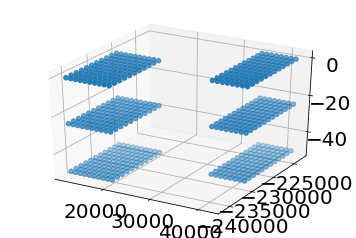

In [247]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X,Y,z0)

0 / 618  drifters NaN-ed out.


/opt/tracpy/tracpy/inout.py:75: MatplotlibDeprecationWarning: The find function was deprecated in version 2.2.
  istart = find(dates <= date)[-1]
/opt/tracpy/tracpy/tracpy_class.py:350: MatplotlibDeprecationWarning: The find function was deprecated in version 2.2.
  ka[i] = find(ind)[-1]


Using GCM model output index  0


/opt/tracpy/tracpy/tracpy_class.py:485: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self.z0 != 's' and self.zpar != self.grid.km-1:


Using GCM model output index  1
Using GCM model output index  2
Using GCM model output index  3
Using GCM model output index  4
Using GCM model output index  5
Using GCM model output index  6
Using GCM model output index  7
Using GCM model output index  8
Using GCM model output index  9
Using GCM model output index  10
Using GCM model output index  11
Using GCM model output index  12
Using GCM model output index  13
Using GCM model output index  14
Using GCM model output index  15
Using GCM model output index  16
Using GCM model output index  17
Using GCM model output index  18
Using GCM model output index  19
Using GCM model output index  20
Using GCM model output index  21
Using GCM model output index  22
Using GCM model output index  23
Using GCM model output index  24
Using GCM model output index  25
Using GCM model output index  26
Using GCM model output index  27
Using GCM model output index  28
Using GCM model output index  29
Using GCM model output index  30
Using GCM model out

Using GCM model output index  246
Using GCM model output index  247
Using GCM model output index  248
Using GCM model output index  249
Using GCM model output index  250
Using GCM model output index  251
Using GCM model output index  252
Using GCM model output index  253
Using GCM model output index  254
Using GCM model output index  255
Using GCM model output index  256
Using GCM model output index  257
Using GCM model output index  258
Using GCM model output index  259
Using GCM model output index  260
Using GCM model output index  261
Using GCM model output index  262
Using GCM model output index  263
Using GCM model output index  264
Using GCM model output index  265
Using GCM model output index  266
Using GCM model output index  267
Using GCM model output index  268
Using GCM model output index  269
Using GCM model output index  270
Using GCM model output index  271
Using GCM model output index  272
Using GCM model output index  273
Using GCM model output index  274
Using GCM mode

Using GCM model output index  487
Using GCM model output index  488
Using GCM model output index  489
Using GCM model output index  490
Using GCM model output index  491
Using GCM model output index  492
Using GCM model output index  493
Using GCM model output index  494
Using GCM model output index  495
Using GCM model output index  496
Using GCM model output index  497
Using GCM model output index  498
Using GCM model output index  499
Using GCM model output index  500
Using GCM model output index  501
Using GCM model output index  502
Using GCM model output index  503
Using GCM model output index  504
Using GCM model output index  505
Using GCM model output index  506
Using GCM model output index  507
Using GCM model output index  508
Using GCM model output index  509
Using GCM model output index  510
Using GCM model output index  511
Using GCM model output index  512
Using GCM model output index  513
Using GCM model output index  514
Using GCM model output index  515
Using GCM mode

Using GCM model output index  728
Using GCM model output index  729
Using GCM model output index  730
Using GCM model output index  731
Using GCM model output index  732
Using GCM model output index  733
Using GCM model output index  734
Using GCM model output index  735
Using GCM model output index  736
Using GCM model output index  737
Using GCM model output index  738
Using GCM model output index  739
Using GCM model output index  740
Using GCM model output index  741
Using GCM model output index  742
Using GCM model output index  743
Using GCM model output index  744
Using GCM model output index  745
Using GCM model output index  746
Using GCM model output index  747
Using GCM model output index  748
Using GCM model output index  749
Using GCM model output index  750
Using GCM model output index  751
Using GCM model output index  752
Using GCM model output index  753
Using GCM model output index  754
Using GCM model output index  755
Using GCM model output index  756
Using GCM mode

Using GCM model output index  969
Using GCM model output index  970
Using GCM model output index  971
Using GCM model output index  972
Using GCM model output index  973
Using GCM model output index  974
Using GCM model output index  975
Using GCM model output index  976
Using GCM model output index  977
Using GCM model output index  978
Using GCM model output index  979
Using GCM model output index  980
Using GCM model output index  981
Using GCM model output index  982
Using GCM model output index  983
Using GCM model output index  984
Using GCM model output index  985
Using GCM model output index  986
Using GCM model output index  987
Using GCM model output index  988
Using GCM model output index  989
Using GCM model output index  990
Using GCM model output index  991
Using GCM model output index  992
Using GCM model output index  993
Using GCM model output index  994
Using GCM model output index  995
Using GCM model output index  996
Using GCM model output index  997
Using GCM mode

Using GCM model output index  1204
Using GCM model output index  1205
Using GCM model output index  1206
Using GCM model output index  1207
Using GCM model output index  1208
Using GCM model output index  1209
Using GCM model output index  1210
Using GCM model output index  1211
Using GCM model output index  1212
Using GCM model output index  1213
Using GCM model output index  1214
Using GCM model output index  1215
Using GCM model output index  1216
Using GCM model output index  1217
Using GCM model output index  1218
Using GCM model output index  1219
Using GCM model output index  1220
Using GCM model output index  1221
Using GCM model output index  1222
Using GCM model output index  1223
Using GCM model output index  1224
Using GCM model output index  1225
Using GCM model output index  1226
Using GCM model output index  1227
Using GCM model output index  1228
Using GCM model output index  1229
Using GCM model output index  1230
Using GCM model output index  1231
Using GCM model outp

Using GCM model output index  1439

Simulation name:  test3d_1994July1

Total run time: 1917.807696 (seconds)
---------------------------------------------
Time spent on:
	1: Preparing for simulation    		2.6339 (0.1373%)
	2: Preparing for model step    		1877.8011 (97.9139%)
	3: Stepping, using TRACMASS    		6.5892 (0.3436%)
	4: Processing after model step 		29.7952 (1.5536%)
	5: Processing after simulation 		0.9883 (0.0515%)


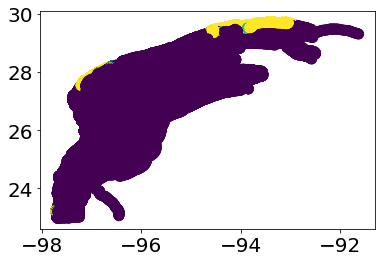

0 / 618  drifters NaN-ed out.
Using GCM model output index  0
Using GCM model output index  1
Using GCM model output index  2
Using GCM model output index  3
Using GCM model output index  4
Using GCM model output index  5
Using GCM model output index  6
Using GCM model output index  7
Using GCM model output index  8
Using GCM model output index  9
Using GCM model output index  10
Using GCM model output index  11
Using GCM model output index  12
Using GCM model output index  13
Using GCM model output index  14
Using GCM model output index  15
Using GCM model output index  16
Using GCM model output index  17
Using GCM model output index  18
Using GCM model output index  19
Using GCM model output index  20
Using GCM model output index  21
Using GCM model output index  22
Using GCM model output index  23
Using GCM model output index  24
Using GCM model output index  25
Using GCM model output index  26
Using GCM model output index  27
Using GCM model output index  28
Using GCM model output 

Using GCM model output index  244
Using GCM model output index  245
Using GCM model output index  246
Using GCM model output index  247
Using GCM model output index  248
Using GCM model output index  249
Using GCM model output index  250
Using GCM model output index  251
Using GCM model output index  252
Using GCM model output index  253
Using GCM model output index  254
Using GCM model output index  255
Using GCM model output index  256
Using GCM model output index  257
Using GCM model output index  258
Using GCM model output index  259
Using GCM model output index  260
Using GCM model output index  261
Using GCM model output index  262
Using GCM model output index  263
Using GCM model output index  264
Using GCM model output index  265
Using GCM model output index  266
Using GCM model output index  267
Using GCM model output index  268
Using GCM model output index  269
Using GCM model output index  270
Using GCM model output index  271
Using GCM model output index  272
Using GCM mode

Using GCM model output index  485
Using GCM model output index  486
Using GCM model output index  487
Using GCM model output index  488
Using GCM model output index  489
Using GCM model output index  490
Using GCM model output index  491
Using GCM model output index  492
Using GCM model output index  493
Using GCM model output index  494
Using GCM model output index  495
Using GCM model output index  496
Using GCM model output index  497
Using GCM model output index  498
Using GCM model output index  499
Using GCM model output index  500
Using GCM model output index  501
Using GCM model output index  502
Using GCM model output index  503
Using GCM model output index  504
Using GCM model output index  505
Using GCM model output index  506
Using GCM model output index  507
Using GCM model output index  508
Using GCM model output index  509
Using GCM model output index  510
Using GCM model output index  511
Using GCM model output index  512
Using GCM model output index  513
Using GCM mode

Using GCM model output index  726
Using GCM model output index  727
Using GCM model output index  728
Using GCM model output index  729
Using GCM model output index  730
Using GCM model output index  731
Using GCM model output index  732
Using GCM model output index  733
Using GCM model output index  734
Using GCM model output index  735
Using GCM model output index  736
Using GCM model output index  737
Using GCM model output index  738
Using GCM model output index  739
Using GCM model output index  740
Using GCM model output index  741
Using GCM model output index  742
Using GCM model output index  743
Using GCM model output index  744
Using GCM model output index  745
Using GCM model output index  746
Using GCM model output index  747
Using GCM model output index  748
Using GCM model output index  749
Using GCM model output index  750
Using GCM model output index  751
Using GCM model output index  752
Using GCM model output index  753
Using GCM model output index  754
Using GCM mode

Using GCM model output index  967
Using GCM model output index  968
Using GCM model output index  969
Using GCM model output index  970
Using GCM model output index  971
Using GCM model output index  972
Using GCM model output index  973
Using GCM model output index  974
Using GCM model output index  975
Using GCM model output index  976
Using GCM model output index  977
Using GCM model output index  978
Using GCM model output index  979
Using GCM model output index  980
Using GCM model output index  981
Using GCM model output index  982
Using GCM model output index  983
Using GCM model output index  984
Using GCM model output index  985
Using GCM model output index  986
Using GCM model output index  987
Using GCM model output index  988
Using GCM model output index  989
Using GCM model output index  990
Using GCM model output index  991
Using GCM model output index  992
Using GCM model output index  993
Using GCM model output index  994
Using GCM model output index  995
Using GCM mode

Using GCM model output index  1203
Using GCM model output index  1204
Using GCM model output index  1205
Using GCM model output index  1206
Using GCM model output index  1207
Using GCM model output index  1208
Using GCM model output index  1209
Using GCM model output index  1210
Using GCM model output index  1211
Using GCM model output index  1212
Using GCM model output index  1213
Using GCM model output index  1214
Using GCM model output index  1215
Using GCM model output index  1216
Using GCM model output index  1217
Using GCM model output index  1218
Using GCM model output index  1219
Using GCM model output index  1220
Using GCM model output index  1221
Using GCM model output index  1222
Using GCM model output index  1223
Using GCM model output index  1224
Using GCM model output index  1225
Using GCM model output index  1226
Using GCM model output index  1227
Using GCM model output index  1228
Using GCM model output index  1229
Using GCM model output index  1230
Using GCM model outp

Using GCM model output index  1438
Using GCM model output index  1439

Simulation name:  test3d_1994July2

Total run time: 1922.268634 (seconds)
---------------------------------------------
Time spent on:
	1: Preparing for simulation    		2.7936 (0.1453%)
	2: Preparing for model step    		1879.8796 (97.7948%)
	3: Stepping, using TRACMASS    		6.9662 (0.3624%)
	4: Processing after model step 		31.5922 (1.6435%)
	5: Processing after simulation 		1.0370 (0.0539%)


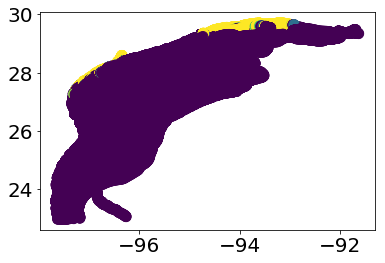

0 / 618  drifters NaN-ed out.
Using GCM model output index  0
Using GCM model output index  1
Using GCM model output index  2
Using GCM model output index  3
Using GCM model output index  4
Using GCM model output index  5
Using GCM model output index  6
Using GCM model output index  7
Using GCM model output index  8
Using GCM model output index  9
Using GCM model output index  10
Using GCM model output index  11
Using GCM model output index  12
Using GCM model output index  13
Using GCM model output index  14
Using GCM model output index  15
Using GCM model output index  16
Using GCM model output index  17
Using GCM model output index  18
Using GCM model output index  19
Using GCM model output index  20
Using GCM model output index  21
Using GCM model output index  22
Using GCM model output index  23
Using GCM model output index  24
Using GCM model output index  25
Using GCM model output index  26
Using GCM model output index  27
Using GCM model output index  28
Using GCM model output 

Using GCM model output index  244
Using GCM model output index  245
Using GCM model output index  246
Using GCM model output index  247
Using GCM model output index  248
Using GCM model output index  249
Using GCM model output index  250
Using GCM model output index  251
Using GCM model output index  252
Using GCM model output index  253
Using GCM model output index  254
Using GCM model output index  255
Using GCM model output index  256
Using GCM model output index  257
Using GCM model output index  258
Using GCM model output index  259
Using GCM model output index  260
Using GCM model output index  261
Using GCM model output index  262
Using GCM model output index  263
Using GCM model output index  264
Using GCM model output index  265
Using GCM model output index  266
Using GCM model output index  267
Using GCM model output index  268
Using GCM model output index  269
Using GCM model output index  270
Using GCM model output index  271
Using GCM model output index  272
Using GCM mode

Using GCM model output index  485
Using GCM model output index  486
Using GCM model output index  487
Using GCM model output index  488
Using GCM model output index  489
Using GCM model output index  490
Using GCM model output index  491
Using GCM model output index  492
Using GCM model output index  493
Using GCM model output index  494
Using GCM model output index  495
Using GCM model output index  496
Using GCM model output index  497
Using GCM model output index  498
Using GCM model output index  499
Using GCM model output index  500
Using GCM model output index  501
Using GCM model output index  502
Using GCM model output index  503
Using GCM model output index  504
Using GCM model output index  505
Using GCM model output index  506
Using GCM model output index  507
Using GCM model output index  508
Using GCM model output index  509
Using GCM model output index  510
Using GCM model output index  511
Using GCM model output index  512
Using GCM model output index  513
Using GCM mode

Using GCM model output index  726
Using GCM model output index  727
Using GCM model output index  728
Using GCM model output index  729
Using GCM model output index  730
Using GCM model output index  731
Using GCM model output index  732
Using GCM model output index  733
Using GCM model output index  734
Using GCM model output index  735
Using GCM model output index  736
Using GCM model output index  737
Using GCM model output index  738
Using GCM model output index  739
Using GCM model output index  740
Using GCM model output index  741
Using GCM model output index  742
Using GCM model output index  743
Using GCM model output index  744
Using GCM model output index  745
Using GCM model output index  746
Using GCM model output index  747
Using GCM model output index  748
Using GCM model output index  749
Using GCM model output index  750
Using GCM model output index  751
Using GCM model output index  752
Using GCM model output index  753
Using GCM model output index  754
Using GCM mode

Using GCM model output index  967
Using GCM model output index  968
Using GCM model output index  969
Using GCM model output index  970
Using GCM model output index  971
Using GCM model output index  972
Using GCM model output index  973
Using GCM model output index  974
Using GCM model output index  975
Using GCM model output index  976
Using GCM model output index  977
Using GCM model output index  978
Using GCM model output index  979
Using GCM model output index  980
Using GCM model output index  981
Using GCM model output index  982
Using GCM model output index  983
Using GCM model output index  984
Using GCM model output index  985
Using GCM model output index  986
Using GCM model output index  987
Using GCM model output index  988
Using GCM model output index  989
Using GCM model output index  990
Using GCM model output index  991
Using GCM model output index  992
Using GCM model output index  993
Using GCM model output index  994
Using GCM model output index  995
Using GCM mode

Using GCM model output index  1203
Using GCM model output index  1204
Using GCM model output index  1205
Using GCM model output index  1206
Using GCM model output index  1207
Using GCM model output index  1208
Using GCM model output index  1209
Using GCM model output index  1210
Using GCM model output index  1211
Using GCM model output index  1212
Using GCM model output index  1213
Using GCM model output index  1214
Using GCM model output index  1215
Using GCM model output index  1216
Using GCM model output index  1217
Using GCM model output index  1218
Using GCM model output index  1219
Using GCM model output index  1220
Using GCM model output index  1221
Using GCM model output index  1222
Using GCM model output index  1223
Using GCM model output index  1224
Using GCM model output index  1225
Using GCM model output index  1226
Using GCM model output index  1227
Using GCM model output index  1228
Using GCM model output index  1229
Using GCM model output index  1230
Using GCM model outp

Using GCM model output index  1438
Using GCM model output index  1439

Simulation name:  test3d_1994July3

Total run time: 1907.940781 (seconds)
---------------------------------------------
Time spent on:
	1: Preparing for simulation    		2.9038 (0.1522%)
	2: Preparing for model step    		1866.1936 (97.8119%)
	3: Stepping, using TRACMASS    		7.0374 (0.3688%)
	4: Processing after model step 		30.8190 (1.6153%)
	5: Processing after simulation 		0.9870 (0.0517%)


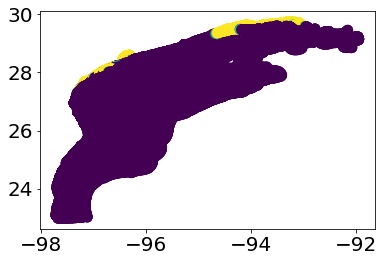

In [248]:
grid = tracpy.inout.readgrid(loc, proj, usespherical=True)

years = np.arange(1994,1995)

for year in years:
    month = 7   # July
    days = np.arange(1,4)
    for day in days:
        date = datetime.datetime(year, month, day, 0)
        name = "test3d_%dJuly%d" %(year,day) # 3d_2005July27
        if not os.path.exists('tracks/' + name + '.nc') and not os.path.exists('tracks/' + name + 'gc.nc'):
            tp = Tracpy(loc, grid, name=name, tseas=tseas, ndays=ndays, 
                        nsteps=nsteps,N=N, ff=ff, ah=ah, av=av, doturb=doturb, 
                        do3d=do3d, z0=z0, zpar=zpar, time_units=time_units)
            
            lon0, lat0 = tp.grid.proj(X, Y, inverse=True)
            lon0, lat0 = tracpy.tools.check_points(lon0, lat0, tp.grid)
            lonp, latp, zp, t, T0, U, V = tracpy.run.run(tp, date, lon0, lat0)
            plt.scatter(lonp, latp, s=100, c=zp)
            plt.show()

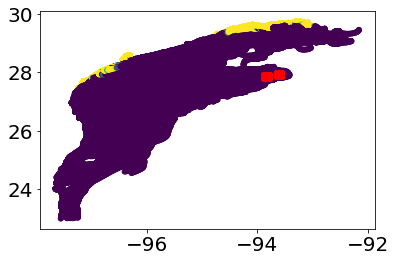

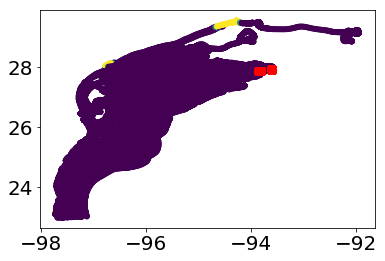

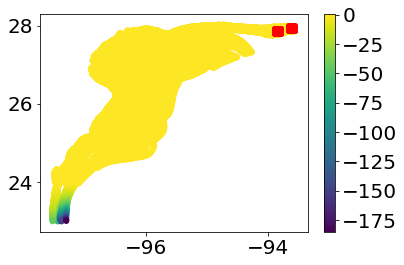

In [250]:
#tracpy.calcs.Var gives 625 for the depth when I pass in the projected coordinates and 2608 when I pass in the longitude and the latitude. Those numbers seem very 


plt.scatter(lonp[0:206], latp[0:206], s=100, c=zp[0:206], marker=".")
plt.plot(lon0,lat0,"ro")
plt.show()

plt.scatter(lonp[206:412], latp[206:412], s=100, c=zp[206:412], marker=".")
plt.plot(lon0,lat0,"ro")
plt.show()

plt.scatter(lonp[412:618], latp[412:618], s=100, c=zp[412:618], marker=".")
plt.plot(lon0,lat0,"ro")
plt.colorbar()
plt.show()


In [87]:
print(lon.shape,lat.shape,depths.shape)
print(tp.grid.lon_rho.shape, tp.grid.lat_rho.shape, tp.grid.h.shape)

(206,) (206,) (206,)
(191, 671) (191, 671) (191, 671)


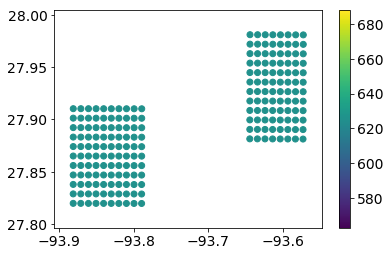

In [108]:
plt.scatter(lon,lat,c=depths)
plt.colorbar()

In [102]:
zsurf = np.array([0] * 206)
zdept = np.array([-50] * 206)


206


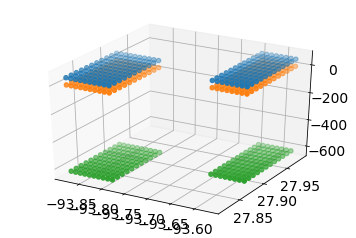

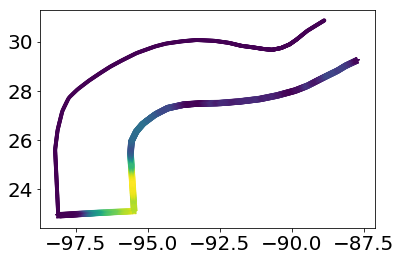

[[3062.44353121 3052.41791844 3043.85256726 ...  652.49188119
   636.52705503  625.32748994]
 [3042.51005519 3032.22568384 3022.55833013 ...  598.34443354
   581.33095882  573.81874195]
 [3022.58866131 3012.21572502 3002.02054913 ...  542.83258037
   525.37549794  517.881682  ]
 ...
 [   5.            5.            5.         ...    5.
     5.            5.        ]
 [   5.            5.            5.         ...    5.
     5.            5.        ]
 [   5.            5.            5.         ...    5.
     5.            5.        ]]
-- / 2695  drifters NaN-ed out.
681


In [14]:
# import cmocean as cm
plt.scatter(tp.grid.lon_rho[-1,:], tp.grid.lat_rho[-1,:],  c=tp.grid.h[-1,:], marker=".")
plt.scatter(tp.grid.lon_rho[0,:], tp.grid.lat_rho[0,:],  c=tp.grid.h[0,:], marker="*")
plt.scatter(tp.grid.lon_rho[:,0], tp.grid.lat_rho[:,0],  c=tp.grid.h[:,0], marker="*")
plt.scatter(tp.grid.lon_rho[0,:], tp.grid.lat_rho[0,:],  c=tp.grid.h[0,:], marker="*")
plt.show()
#plt.colorbar()


print(tp.grid.h[:])
# tp.grid.h.shape



# Input starting locations as real space lon,lat locations
lon0, lat0 = np.meshgrid(np.linspace(-98.5,-87.5,55), \
                            np.linspace(22.5,31,49)) # whole domain, 20 km

# Eliminate points that are outside domain or in masked areas
lon0, lat0 = tracpy.tools.check_points(lon0, lat0, tp.grid)
print(lon0.size)